# Introdução ao Matplotlib

## Bibliotecas

In [1]:
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Exemplos de gráficos

### Gráficos de Linhas

<class 'matplotlib.axes._subplots.AxesSubplot'>


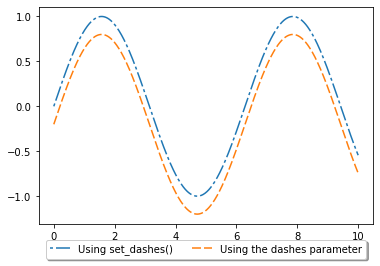

In [2]:
x = np.linspace(0, 10, 500) # Semelhante a np.arange, a diferença é que se especifica a quantidade de valores, nao os limites
y = np.sin(x) # Calcula o seno para cada item do array

fig, ax = plt.subplots()# Retorna uma figura e as axes
print(type(ax))

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

### Contorno e Pcolormesh

Text(0.5, 1.0, 'Simplest contour with labels')

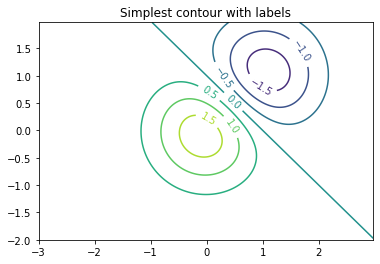

In [3]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y) # é obrigatório
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest contour with labels')

Text(0.5, 1.0, 'pcolormesh grids and shading')

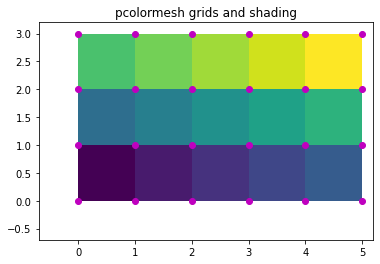

In [4]:
# Pcolormesh
nrows = 3
ncols = 5
Z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='flat', vmin=Z.min(), vmax=Z.max())


def _annotate(ax, x, y, title):
    # this all gets repeated below:
    X, Y = np.meshgrid(x, y)
    ax.plot(X.flat, Y.flat, 'o', color='m')
    ax.set_xlim(-0.7, 5.2)
    ax.set_ylim(-0.7, 3.2)
    ax.set_title(title)

_annotate(ax, x, y, "shading='flat'")
ax.set_title('pcolormesh grids and shading')

### Histogramas

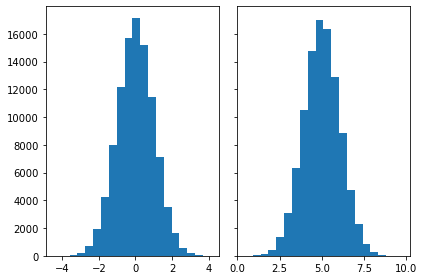

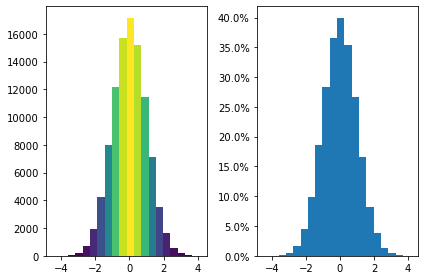

In [5]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

### Histograma 2D

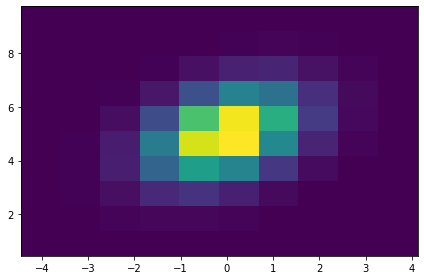

In [6]:
# Utilizando os valores anteriores
fig, ax = plt.subplots(tight_layout = True)
hist = ax.hist2d(x, y)

### Paths

In [7]:
from matplotlib.path import Path
import matplotlib.patches as patches

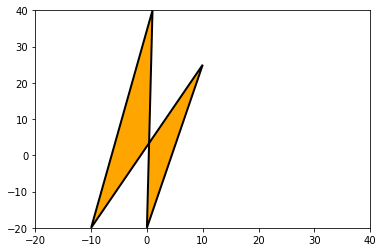

In [8]:
verts = [
    # Faça sua arte
   (0., -20.),  # left, bottom
   (10., 25.),  # left, top
   (-10., -20.),  # right, top
   (1., 40.),  # right, bottom
   (0., 15.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)
fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-20, 40)
ax.set_ylim(-20, 40)
plt.show()

### Streamplot

In [9]:
import matplotlib.gridspec as gridspec

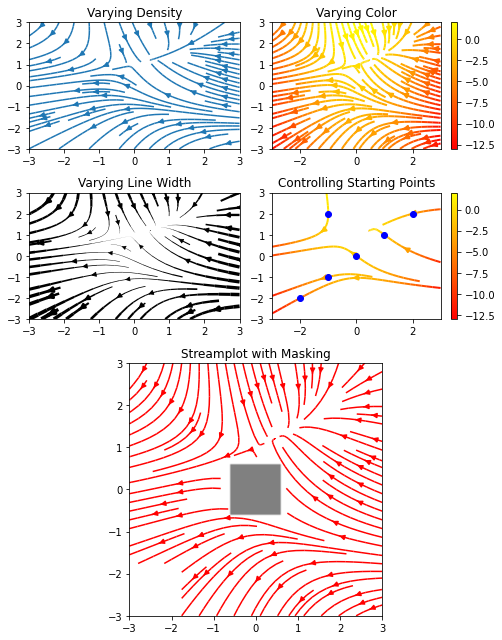

In [10]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

### Gráficos de barras

Text(0.5, 0.98, 'Categorical Plotting')

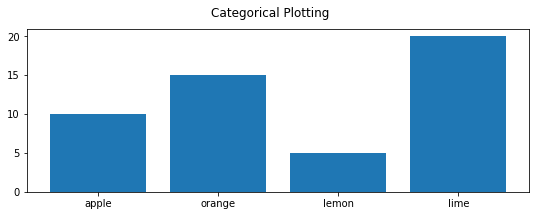

In [11]:
# Exemplo 1 - Gráfico de barras simples

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(9, 3))
axs.bar(names, values)
fig.suptitle('Categorical Plotting')

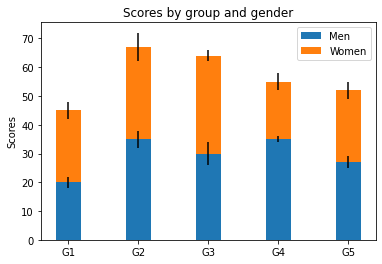

In [12]:
# Exemplo 2 - Gráfico de barras empilhado

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

### Começando pelo básico

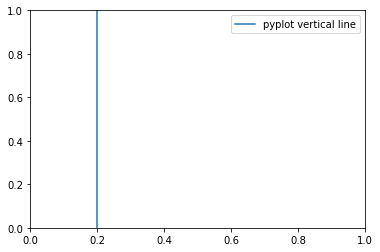

In [13]:
# Para plotar uma linha vertical com pyplot, você pode usar a função axvline ().
# Sintaxe = plt.axvline (x = 0, ymin = 0, ymax = 1, ** kwargs)

plt.axvline(0.2, 0, 1, label = 'pyplot vertical line')
plt.legend()
plt.show()

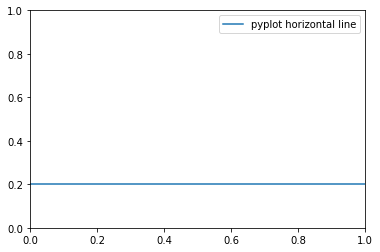

In [14]:
# Linha horizontal O axhline () traça uma linha horizontal.
# Sintaxe = plt.axhline (y = 0, xmin = 0, xmax = 1, ** kwargs)

ypoints = 0.2
plt.axhline(ypoints, 0, 1, label = 'pyplot horizontal line')
plt.legend()
plt.show()

### Múltiplas linhas

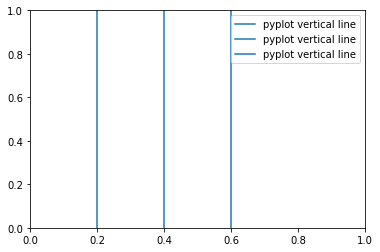

In [15]:
# Para plotar várias linhas verticais, podemos criar uma matriz de "X" pontos/coordenadas e, 
# em seguida, iterar em cada elemento da matriz para plotar mais de uma linha.

xpoints = [0.2, 0.4, 0.6]
for p in xpoints:
    plt.axvline(p, label = 'pyplot vertical line')
plt.legend()
plt.show()

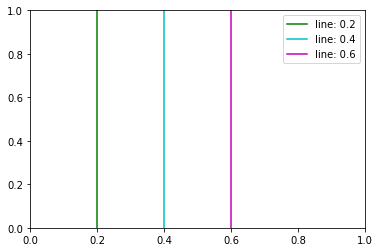

In [16]:
# Agora com cores, para ajudar na identificação de cada linha
xpoints = [0.2, 0.4, 0.6]
colors = ['g', 'c', 'm']

for p, c in zip(xpoints, colors):
    plt.axvline(p,  label='line: {}'.format(p), c=c)
plt.legend()
plt.show()

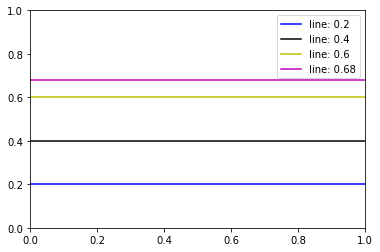

In [17]:
# utilizando linhas horizontais
ypoints = [0.2, 0.4, 0.6, 0.68]
colors = ['b', 'k', 'y', 'm']

for p, c in zip(ypoints, colors):
    plt.axhline(p, label='line: {}'.format(p), c=c)
plt.legend()
plt.show()

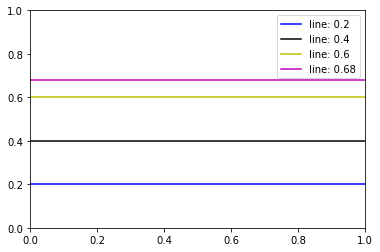

In [18]:
# salvando a figura
ypoints = [0.2, 0.4, 0.6, 0.68]
colors = ['b','k','y', 'm']
for p, c in zip(ypoints, colors):
    plt.axhline(p, label='line: {}'.format(p), c=c)
plt.savefig('horizontal_lines.png')
plt.legend()
plt.show()

### Plots Múltiplos

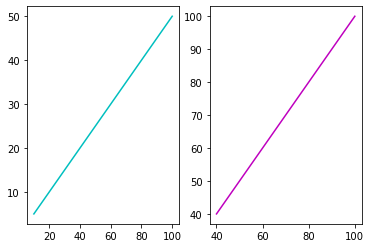

In [19]:
# Você pode gerar vários gráficos na mesma figura com a ajuda da função subplot()
# Sintaxe = matplotlib .pyplot .subplot ( nrows , ncols , index , ** kwargs )

plt.subplot(1, 2, 1)
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.plot(x1, y1, color='c')
plt.subplot(1, 2, 2)
x2 = [40, 50, 60, 70, 80, 90, 100]
y2 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, y2, color='m')
plt.show()

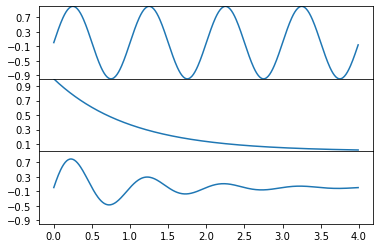

In [20]:
# Subplots adjacentes
t = np.arange(start=0.0, stop=4.0, step=0.01)
# A função arange NumPy retorna valores numéricos espaçados uniformemente dentro de um intervalo, 
# armazenados como uma matriz NumPy (ou seja, um objeto ndarray).

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

fig, axs = plt.subplots(3, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(-1, 1)

plt.show()

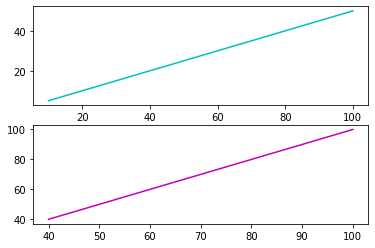

In [21]:
# com 2 linhas
plt.subplot(2, 1, 1)
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.plot(x1, y1, color='c')
plt.subplot(2, 1, 2)
x2 = [40, 50, 60, 70, 80, 90, 100]
y2 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, y2, color='m')
plt.show()

### Grade de gráficos 2 x 2

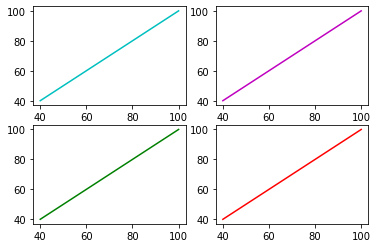

In [22]:
# Subplot 1
plt.subplot(2, 2, 1)
x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x1, y1, color = 'c')

# subplot 2
plt.subplot(2, 2, 2)
x2 = [40, 50, 60, 70, 80, 90, 100]
y2 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, y2, color='m')

# subplot 3
# Subplot 3
plt.subplot(2, 2, 3)
x3 = [40, 50, 60, 70, 80, 90, 100]
y3 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x3, y3, color = "g")

# Subplot 4
plt.subplot(2, 2, 4)
x4 = [40, 50, 60, 70, 80, 90, 100]
y4 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x4, y4, color = "r")
plt.show()

### Axis range

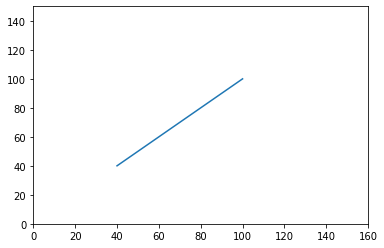

In [23]:
# É possivel definir o intervalo ou limite dos eixos ‘x’ e ‘y’ 
# usando as funções xlim () e ylim () do pyplot.

x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]

plt.plot(x1, y1)
plt.xlim([0, 160])
plt.ylim([0, 150])
plt.show()

### Label axis

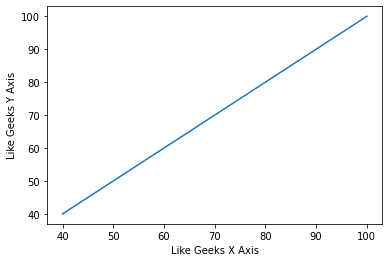

In [24]:
# Você pode criar os rótulos para os eixos ‘x’ e ‘y’ usando as funções xlabel () e ylabel () do pyplot
# sintaxe = matplotlib.pyplot.xlabel(labeltext, labelfontdict, *kwargs)
# sintaxe = matplotlib.pyplot.ylabel(labeltext, labelfontdict, *kwargs)

x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]

plt.plot(x1, y1)
plt.xlabel('Like Geeks X Axis')
plt.ylabel('Like Geeks Y Axis')
plt.show()

In [25]:
# Limpar o plot, quando é necessário limpar todos os parâmetros já configurados para gerar outro plot
# sintaxe = matplotlib.pyplot.clf() 
## Esta função não recebe parâmetros

x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x1, x2)
plt.xlabel('Like Geeks X Axis')
plt.ylabel('Like Geeks Y Axis')
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

# Seaborn: statistical data visualization 

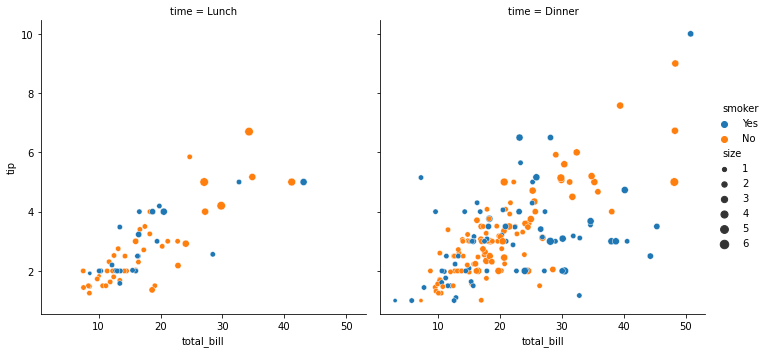

In [26]:
# primeiro gráfico Seaborn
import seaborn as sns

# load an example dataset
tips = sns.load_dataset('tips')

# Create a visualization
sns.relplot(data=tips, 
            x='total_bill', 
            y='tip', 
            col='time', 
            hue='smoker', size='size')

A função relplot () é nomeada dessa forma porque foi projetada para visualizar muitos relacionamentos estatísticos diferentes. Embora os gráficos de dispersão geralmente sejam eficazes, os relacionamentos em que uma variável representa uma medida de tempo são melhor representados por uma linha. A função relplot () tem um parâmetro de tipo conveniente que permite alternar facilmente para esta representação alternativa:

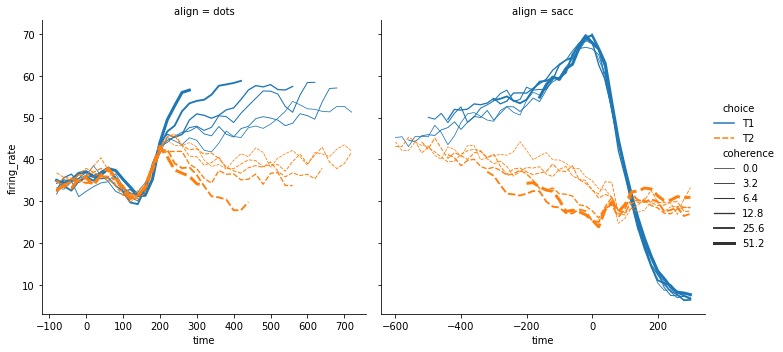

In [27]:
## Troca ágil de tipos de gráficos
dots = sns.load_dataset('dots')
sns.relplot(data=dots, 
            kind='line', 
            x='time', 
            y='firing_rate', 
            col='align', 
            hue='choice', 
            size='coherence', 
            style='choice', facet_kws=dict(sharex=False),
)
            

## Utilizando Seaborn para criar um mapa de calor
**Utilização:** Esta é uma ótima maneira de visualizar dados, pois pode mostrar a relação entre variáveis, incluindo o tempo.

<AxesSubplot:>

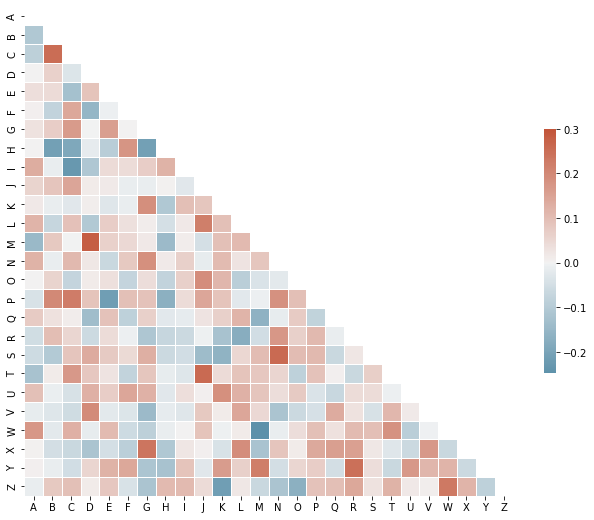

In [28]:
# Exemplo 1
from string import ascii_letters
import pandas as pd
import seaborn as sns

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)), 
                columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink":.5})

<AxesSubplot:xlabel='year', ylabel='month'>

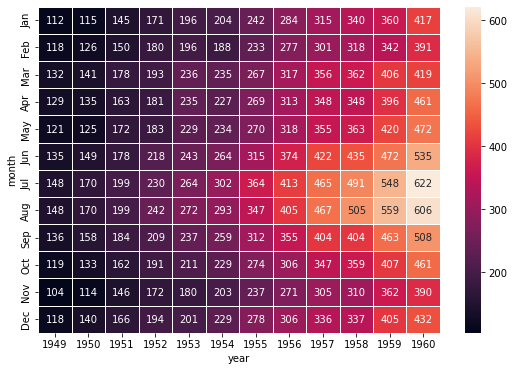

In [29]:
# Exemplo 2
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset('flights')
flights = flights_long.pivot('month', 'year', 'passengers')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt='d', linewidths=.5, ax=ax)

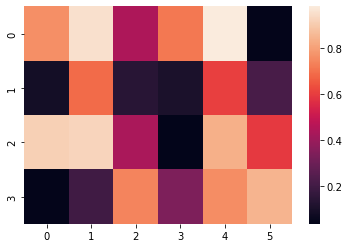

In [30]:
# Exemplo 3
## gerar uma matriz de números aleatórios entre um determinado intervalo, que será plotada como um mapa de calor.
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data)

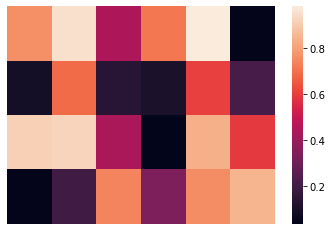

In [31]:
# Os valores no eixo 'x' e 'y' para cada bloco no mapa de calor são chamados de rótulos de escala (tick labels). 
## Seaborn adiciona os tick labels por padrão. 
### Se quisermos remove-los, podemos definir o atributo xticklabel ou ytickelabel do mapa de calor como False.

heat_map = sns.heatmap(data, xticklabels=False, yticklabels=False)

Text(0.5, 15.0, 'Values on X axis')

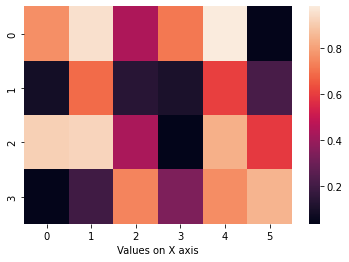

In [32]:
# adicionar um rótulo no eixo x usando o atributo xlabel
heat_map = sns.heatmap(data)
plt.xlabel('Values on X axis')

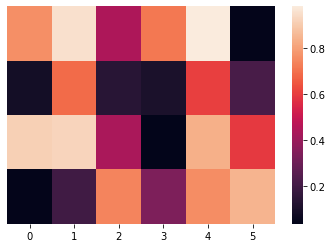

In [33]:
# Seaborn adiciona os rótulos para o eixo y por padrão. 
# Para removê-los, podemos definir os yticklabels como false.
heat_map = sns.heatmap(data, yticklabels=False)

Text(33.0, 0.5, 'Values on Y axis')

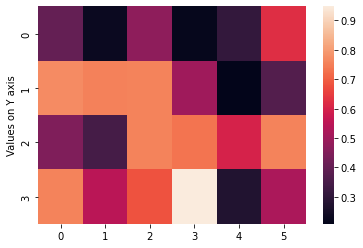

In [34]:
# adicionar um rótulo no eixo y usando o atributo ylabel
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data)
plt.ylabel('Values on Y axis')

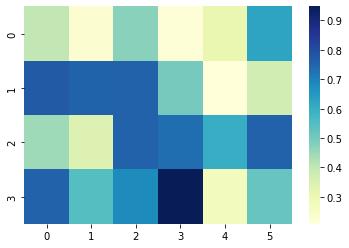

In [35]:
# alterar a cor do mapa de calor 
heat_map = sns.heatmap(data, cmap='YlGnBu')

No mapa de calor Seaborn, temos três tipos diferentes de mapas de cores.
- Mapas de cores sequenciais (Sequential colormaps)
- Paleta de cores divergentes (Diverging color palette)
- Dados discretos (Discrete Data)

#### Mapa de cores sequencial (Sequential colormaps)
##### Paleta de cubo sequencial - Utilizando cubehelix

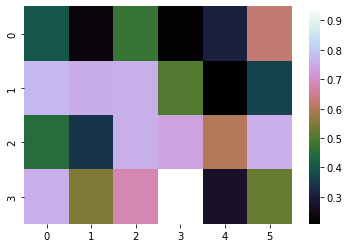

In [36]:
heat_map = sns.heatmap(data, cmap='cubehelix')

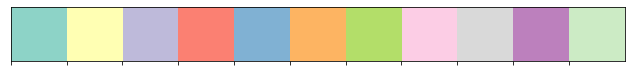

In [37]:
# O argumento 'Set3' é o nome da paleta e 11 é o número de cores discretas na paleta.
sns.palplot(sns.mpl_palette('Set3', 11))

<AxesSubplot:>

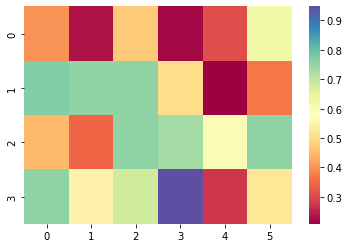

In [38]:
# Mais paletas divergentes
sns.heatmap(data, cmap="Spectral")

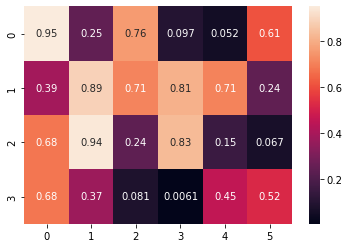

In [39]:
# Adicionar texto sobre o mapa de calor
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data, annot=True)

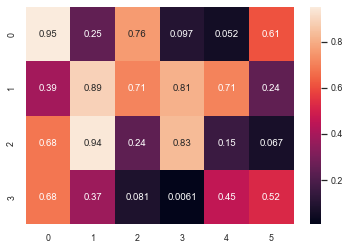

In [40]:
# Ajustar o tamanho da fonte do mapa de calor
sns.set(font_scale=0.8)
heat_map=sns.heatmap(data, annot=True)

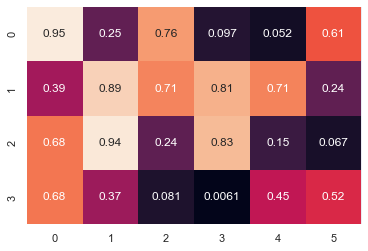

In [41]:
# Seaborn heatmap colorbar, por padrão ela sempre aparece, mas podemos desativar
sns.set(font_scale=1)
heat_map = sns.heatmap(data, annot=True, cbar=False)

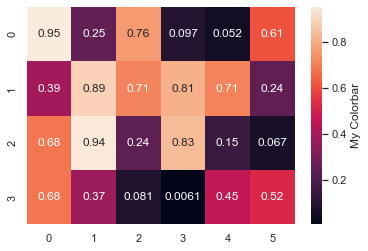

In [42]:
# adicionar um título a barra de cores
heat_map = sns.heatmap(data, annot=True, cbar_kws={'label': 'My Colorbar'})

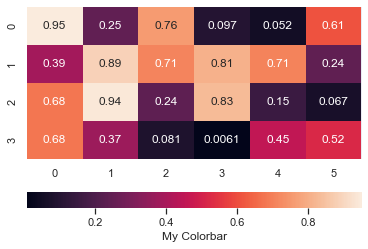

In [43]:
# No cbar_kws, temos que especificar a qual atributo da barra de cores estamos nos referindo.
## podemos mudar a orientação da cor, que por padrão é vertical.
heat_map = sns.heatmap(data, 
                       annot=True, 
                       cbar_kws={'label': 'My Colorbar', 
                                 'orientation': 'horizontal'})

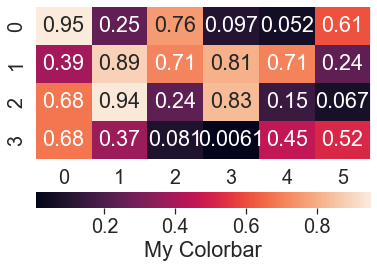

In [44]:
# Alterar o tamanho da fonte da barra de cores do mapa de calor
sns.set(font_scale=1.8)
heat_map = sns.heatmap(data, 
                       annot=True, 
                       cbar_kws={'label': 'My Colorbar', 
                                 'orientation': 'horizontal'})

[Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2'), Text(0, 3.5, '3')]

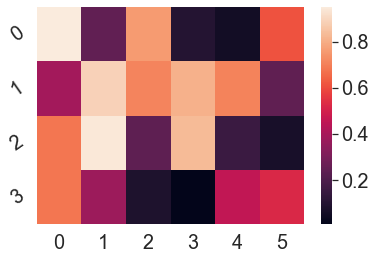

In [45]:
# Alterar a rotação do tick axis
## Para girá-los, primeiro obteremos os yticklabels do mapa de calor e, em seguida, definiremos a rotação como 0:

heat_map = sns.heatmap(data)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=35)

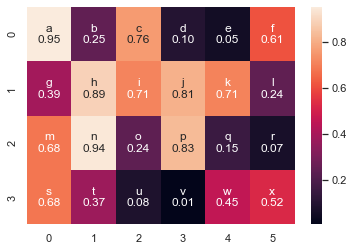

In [46]:
# Adicionar texto e valores no mapa de calor
text = np.asarray([['a', 'b', 'c', 'd', 'e', 'f'], 
                   ['g', 'h', 'i', 'j', 'k', 'l'], 
                   ['m', 'n', 'o', 'p', 'q', 'r'], 
                   ['s', 't', 'u', 'v', 'w', 'x']])

# combinar o texto com os valores e adicionar o resultado ao mapa de calor como um rótulo
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, 
                      data in zip(text.flatten(), 
                                  data.flatten())])).reshape(4,6)

# adicionando labels no heatmap
sns.set(font_scale=1)
heat_map = sns.heatmap(data, 
                       annot=labels, 
                       fmt='')